# More challenging calculation

In [1]:
# Import preliminaries and connect to CPS database
import pandas as pd
import numpy as np
import itertools

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
mpl.rc('axes', edgecolor='white') # Hide the axes
plt.rc('axes', axisbelow=True)

In [2]:
# Calculate totals for several activities 
def contrib_calc(year, data, ages, sex, ser, wc, lfstat):
    """Calculate NILF categories' contribution to group change 
       in labor force measures (lfpr, epop) since 2000."""    
    raw = pd.read_pickle(f'data/cps_{y}.pkl')[ser]
    grouped = raw.groupby('HRMONTH')
    for i, df in grouped:
        date = pd.to_datetime(f'{year}-{i}-01')
        for arg in itertools.product(ages, sex):
            dft = df[(df['PRTAGE'].between(arg[0][0], arg[0][1])) & 
                     (df['PESEX'].isin(arg[1][1]))]
            g = np.where(dft['PEMLR'].isin(range(1,8)), 1, 0)
            gpop = (g * dft['PWCMPWGT']).sum() / wc 
            for lf in lfstat:
                vals = np.where(dft[lf[2]].isin(lf[1]), 1, 0)
                gtot = (vals * dft['PWCMPWGT']).sum() / wc
                data.at[date, f'{lf[0]}'] = gtot / gpop * 100
    return data.sort_index()

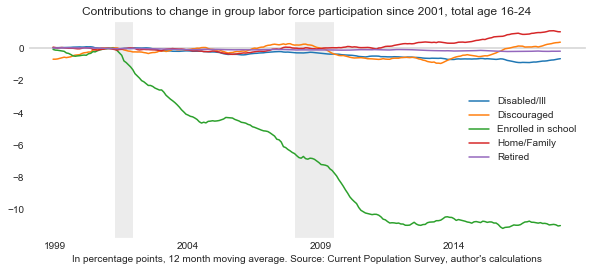

In [17]:
# Run the calculator on each year
ages = [(16, 24)]
sex = [('total', [1, 2])]
data = pd.DataFrame()
ser = ['PWCMPWGT', 'HRMONTH', 'PRTAGE', 'PESEX', 
       'PWORWGT', 'PENLFACT', 'PEMLR', 'PEDWWNTO']
lfstat = [('Disabled/Ill', [6], 'PEMLR'),
          ('Discouraged', [1], 'PEDWWNTO'),          
          ('Enrolled in school', [3], 'PENLFACT'),
          ('Home/Family', [4], 'PENLFACT'), 
          ('Retired', [5], 'PEMLR')]
wc = 10000000.0   # Monthly weight in thousands of people
for y in range(1998, 2019):    # Test small
    data = contrib_calc(y, data, ages, sex, ser, wc, lfstat)
    
# Plot contribution to change in employment rate since 2001
data2 = pd.DataFrame()
df2 = data.rolling(12).mean().dropna()
for month in list(df2.index):
    for col, val in (df2.loc['2001-01-01'] - df2.loc[month]).items():
        data2.at[month, col] = val
        
# Plot change
title = (f'Contributions to change in group labor force participation since 2001,'
         f' {sex[0][0]} age {ages[0][0]}-{ages[0][1]}')
ax = data2.plot(figsize=(10, 4), title=title)
# Recession start and end months, from NBER
rec_dt = [('2001-04-01', '2001-12-01'), ('2008-01-01', '2009-07-01')]
for i, v in rec_dt:
    ax = plt.axvspan(i, v, fill=True, linewidth=0, color='gray', alpha=0.15)  
ax = plt.axhline(y=0, color='lightgray', zorder=1)
ax = plt.xlabel("In percentage points, 12 month moving average. Source: Current Population Survey, author's calculations")
plt.savefig(f'{sex[0][0]}{ages[0][0]}{ages[0][1]}.png', bbox_inches='tight', dpi=200)

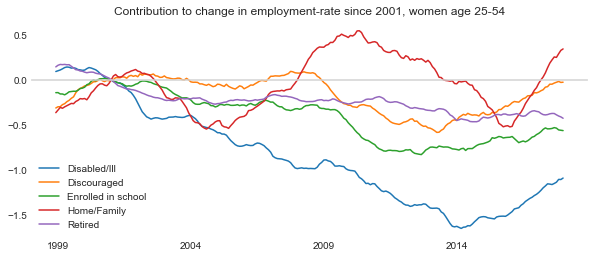

In [40]:
# Plot contribution to change in employment rate since 2001
data2 = pd.DataFrame()
df2 = data.rolling(12).mean().dropna()
for month in list(df2.index):
    for col, val in (df2.loc['2001-01-01'] - df2.loc[month]).items():
        data2.at[month, col] = val
        
# Plot change
ax = data2.plot(figsize=(10, 4), title='Contribution to change in employment-rate since 2001, women age 25-54')
ax = plt.axhline(y=0, color='lightgray')
plt.savefig('women2554.png', bbox_inches='tight', dpi=200)

In [ ]:
# Calculate totals for several activities 
def contrib_calc(year, data, ages, sex, ser, wc, lfstat):
    """Calculate NILF categories' contribution to group change 
       in labor force measures (lfpr, epop) since 2000."""    
    raw = pd.read_pickle(f'data/cps_{y}.pkl')[ser]
    grouped = raw.groupby('HRMONTH')
    for i, df in grouped:
        date = pd.to_datetime(f'{year}-{i}-01')
        for arg in itertools.product(ages, sex):
            group = f'{arg[1][0]}, {arg[0][0]}-{arg[0][1]} years old'
            dft = df[(df['PRTAGE'].between(arg[0][0], arg[0][1])) & 
                     (df['PESEX'].isin(arg[1][1]))]
            g = np.where(dft['PEMLR'].isin(range(1,8)), 1, 0)
            gpop = (g * dft['PWCMPWGT']).sum() / wc 
            for lf in lfstat:
                vals = np.where(dft[lf[2]].isin(lf[1]), 1, 0)
                if lf[0] in ['Disc2', 'Disc3']:
                    gpop = (g * dft['PWORWGT']).sum() / wc
                    gtot = (vals * dft['PWORWGT']).sum() / wc
                else:
                    gtot = (vals * dft['PWCMPWGT']).sum() / wc
                col_name = (f'{lf[0]} {group}')
                #data.at[date, f'{col_name}, in thousands'] = gtot
                data.at[date, f'{col_name}, share'] = gtot / gpop * 100
    return data.sort_index()

In [ ]:
# Run the calculator on each year
ages = [(25, 54)] # (25, 34), (35, 44), (45, 54), (55, 64), 
sex = [('total', [1, 2])] # ('men', [1]), ('women', [2]), 
data = pd.DataFrame()
ser = ['PWCMPWGT', 'HRMONTH', 'PRTAGE', 'PESEX', 
       'PWORWGT', 'PENLFACT', 'PEMLR', 'PEDWWNTO']
lfstat = [#('Unemployed', [2], 'PREMPNOT'), 
          #('Employed', [1], 'PREMPNOT'), 
          #('Labor Force', range(1,5), 'PEMLR'),
          #('Disabled/Ill', [1, 2], 'PENLFACT'),
          ('Disabled/Ill', [6], 'PEMLR'),
          #('Discouraged', [3], 'PREMPNOT'),
          #('Disc2', [1, 2], 'PRDISC'),
          ('Discouraged', [1], 'PEDWWNTO'),          
          #('NILF-other', [4], 'PREMPNOT'), 
          ('School', [3], 'PENLFACT'),
          ('Care', [4], 'PENLFACT'), 
          #('retired1', [5], 'PENLFACT'), 
          #('retired-older', [1], 'PENLFRET'),
          ('retired3', [5], 'PEMLR')]#,
          #('NILF-oth-act', [6], 'PENLFACT')]
wc = 10000000.0   # Monthly weight in thousands of people
for y in range(1998, 2019):    # Test small
    data = contrib_calc(y, data, ages, sex, ser, wc, lfstat)

In [ ]:
data.head()

In [ ]:
data2 = pd.DataFrame()
df2 = data.rolling(12).mean().dropna()
for month in list(df2.index):
    for col, val in (df2.loc['2001-01-01'] - df2.loc[month]).items():
        data2.at[month, col] = val
        
%matplotlib inline
data2.iloc[:,-5:].plot()

In [ ]:
for month in list(df2.index):
    for col, val in (df2.loc['2001-01-01'] - df2.loc[month]).items():
        data2.at[month, col] = val

In [ ]:
#data2.loc['2001-01-01':].rolling(12).mean().dropna()
#val = data2.loc['2001-01-01':] - data.loc['2018-01-01']
data2.to_csv('test7.csv')

In [ ]:
%matplotlib inline
data2.iloc[:,-5:].plot()

In [ ]:
for col, val in data.loc[month] - data.loc['2001-01-01']:
    print(col)

In [ ]:
df2 = data.rolling(12).mean().dropna()
#val = data.loc['2018-01-01'] - data.loc['2001-01-01']

In [ ]:
for x, y in val.items():
    print(x)

In [ ]:
df2.loc['2018-01-01'] - df2.loc['2000-01-01']

In [ ]:
pd.read_pickle('data/cps_1998.pkl')

In [ ]:
# Calculate totals for several activities 
def contrib_calc(year, data, ages, sex, ser, wc):
    """Calculate NILF categories' contribution to group change 
       in labor force measures (lfpr, epop) since 2000."""    
    raw = pd.read_pickle(f'data/cps_{y}.pkl')[ser]
    grouped = raw.groupby('HRMONTH')
    for i, df in grouped:
        date = pd.to_datetime(f'{year}-{i}-01')
        for arg in itertools.product(ages, sex):
            dft = df[(df['PRTAGE'].between(arg[0][0], arg[0][1])) & 
                     (df['PESEX'] == arg[1][1])]
            il = np.where(dft['PENLFACT'].isin([1, 2]), 1, 0)
            sc = np.where(dft['PENLFACT'].isin([3]), 1, 0)
            ca = np.where(dft['PENLFACT'].isin([4]), 1, 0)
            rt1 = np.where(dft['PENLFACT'].isin([5]), 1, 0)
            rt = np.where(dft['PENLFRET'].isin([1]), 1, 0)
            un = np.where(dft['PREMPNOT'].isin([2]), 1, 0)
            em = np.where(dft['PREMPNOT'].isin([1]), 1, 0)
            di = np.where(dft['PREMPNOT'].isin([3]), 1, 0)
            ot = np.where(dft['PREMPNOT'].isin([4]), 1, 0)
            ot2 = np.where(dft['PENLFACT'].isin([6]), 1, 0)
            lfstat = [('Unemployed', un), ('Employed', em), ('Disabled/Ill', il),
                      ('Discouraged', di), ("NILF - other", ot), ('School', sc),
                      ('Care', ca), ('retired1', rt1), ('retired-older', rt),
                      ('NILF-oth-act', ot2)]
            for item, vals in lfstat:
                col_name = (f'{item} {arg[1][0]}, {arg[0][0]}-'
                            f'{arg[0][1]} years old, in thousands')
                data.at[date, col_name] = (vals * dft['PWCMPWGT']).sum() / wc
    return data.sort_index()

In [ ]:
lfstat = [('Unemployed', [2], 'PREMPNOT'), 
          ('Employed', [1], 'PREMPNOT'), 
          ('Disabled/Ill', [1, 2], 'PENLFACT'),
          ('Discouraged', [3], 'PREMPNOT'), 
          ('NILF-other', [4], 'PREMPNOT'), 
          ('School', [3], 'PENLFACT'),
          ('Care', [4], 'PENLFACT'), 
          ('retired1', [5], 'PENLFACT'), 
          ('retired-older', [1], 'PENLFRET'),
          ('NILF-oth-act', [6], 'PENLFACT')]

In [ ]:
def group_total(dft, lf, arg, wc):
    vals = np.where(dft[lf[2]].isin(lf[1]), 1, 0)
    col_name = (f'{lf[0]} {arg[1][0]}, {arg[0][0]}-'
                f'{arg[0][1]} years old, in thousands')
    return (vals * dft['PWCMPWGT']).sum() / wc

In [ ]:
def lf_stat_calc(data, dft, lf, arg, wc):
    vals = np.where(dft['PENLFACT'].isin([1, 2]), 1, 0)
    col_name = (f'{lf[0]} {arg[1][0]}, {arg[0][0]}-'
                f'{arg[0][1]} years old, in thousands')
    data.at[date, col_name] = (val * dft['PWCMPWGT']).sum() / wc
    return data

In [ ]:
# Run the calculator on each year
ages = [(25, 34), (35, 44), (45, 54)]
sex = [('men', 1), ('women', 2)]
data = pd.DataFrame()
ser = ['PREMPNOT', 'PWCMPWGT', 'HRMONTH', 'PRTAGE', 'PESEX', 'PENLFACT', 'PENLFRET', 'PRERNWA']
wc = 10000000.0   # Monthly weight in thousands of people
for y in range(1998, 2019):    # Test small
    data = contrib_calc(y, data, ages, sex, ser, wc)

In [ ]:
raw_contr = 

In [ ]:
df.groupby('PRTAGE')['PRERNWA'].describe()

In [ ]:
df

In [ ]:
data.loc['2000-01-01']

In [ ]:
def contrib_calc(year, data, ages, sex):
    """Calculate NILF categories' contribution to group change 
       in labor force measures (lfpr, epop) since 2000."""    
    ser = ['PREMPNOT', 'PWCMPWGT', 'HRMONTH', 'PRTAGE', 'PESEX', 'PENLFACT', 'PENLFRET']
    wc = 10000000.0   # Monthly weight in thousands of people
    raw = pd.read_pickle(f'data/cps_{y}.pkl')[ser]
    grouped = raw.groupby(['HRMONTH', 'PESEX'])
    for i, df in grouped:
        date = pd.to_datetime(f'{year}-{i}-01')
        for arg in itertools.product(ages, sex):
            dft = df[(df['PRTAGE'].between(arg[0][0], arg[0][1])) & 
                     (df['PESEX'] == arg[1][1])]
            il = np.where(dft['PENLFACT'].isin([1, 2]), 1, 0)
            sc = np.where(dft['PENLFACT'].isin([3]), 1, 0)
            ca = np.where(dft['PENLFACT'].isin([4]), 1, 0)
            rt1 = np.where(dft['PENLFACT'].isin([5]), 1, 0)
            rt = np.where(dft['PENLFRET'].isin([1]), 1, 0)
            un = np.where(dft['PREMPNOT'].isin([2]), 1, 0)
            em = np.where(dft['PREMPNOT'].isin([1]), 1, 0)
            di = np.where(dft['PREMPNOT'].isin([3]), 1, 0)
            ot = np.where(dft['PREMPNOT'].isin([4]), 1, 0)
            ot2 = np.where(dft['PENLFACT'].isin([6]), 1, 0)
            lfstat = [('Unemployed', un), ('Employed', em), ('Disabled/Ill', il),
                      ('Discouraged', di), ("NILF - other", ot), ('School', sc),
                      ('Care', ca), ('retired1', rt1), ('retired-older', rt),
                      ('NILF-oth-act', ot2)]
            for item, vals in lfstat:
                col_name = (f'{item} {arg[1][0]}, {arg[0][0]}-'
                            f'{arg[0][1]} years old, in thousands')
                data.at[date, col_name] = (vals * dft['PWCMPWGT']).sum() / wc
    return data.sort_index()

In [ ]:
data = pd.DataFrame()
ages = [(25, 34), (35, 44), (45, 54)]
sex = {1: 'men', 2: 'women'}
#sex = [('men', 1), ('women', 2)]
ser = ['PREMPNOT', 'PWCMPWGT', 'HRMONTH', 'PRTAGE', 'PESEX', 'PENLFACT', 'PENLFRET']
wc = 10000000.0   # Monthly weight in thousands of people
raw = pd.read_pickle('data/cps_2017.pkl')[ser]
grouped = raw.groupby(['HRMONTH', 'PESEX'])
for i, df in grouped:
    date = pd.to_datetime(f'2017-{i[0]}-01')
    for age in ages:
        dft = df[(df['PRTAGE'].between(age[0], age[1]))]
        il = np.where(dft['PENLFACT'].isin([1, 2]), 1, 0)
        sc = np.where(dft['PENLFACT'].isin([3]), 1, 0)
        ca = np.where(dft['PENLFACT'].isin([4]), 1, 0)
        rt1 = np.where(dft['PENLFACT'].isin([5]), 1, 0)
        rt = np.where(dft['PENLFRET'].isin([1]), 1, 0)
        un = np.where(dft['PREMPNOT'].isin([2]), 1, 0)
        em = np.where(dft['PREMPNOT'].isin([1]), 1, 0)
        di = np.where(dft['PREMPNOT'].isin([3]), 1, 0)
        ot = np.where(dft['PREMPNOT'].isin([4]), 1, 0)
        ot2 = np.where(dft['PENLFACT'].isin([6]), 1, 0)
        lfstat = [('Unemployed', un), ('Employed', em), ('Disabled/Ill', il),
                  ('Discouraged', di), ("NILF - other", ot), ('School', sc),
                  ('Care', ca), ('retired1', rt1), ('retired-older', rt),
                  ('NILF-oth-act', ot2)]
        for item, vals in lfstat:
            col_name = (f'{item} {sex[i[1]]}, {age[0]}-{age[1]} years old, in thousands')
            data.at[date, col_name] = (vals * dft['PWCMPWGT']).sum() / wc

In [ ]:
data

In [ ]:
grouped = df.groupby(['HRMONTH', 'PESEX'])

In [ ]:
for x, y in grouped:
    print(x)

In [ ]:
def contrib_calc():
    """Calculate NILF categories' contribution to group change 
       in labor force measures (lfpr, epop) since 2000."""
    data = pd.DataFrame()
    ages = [(25, 34), (35, 44), (45, 54)]
    sex = [('men', 1), ('women', 2)]
    ser = ['PREMPNOT', 'PWCMPWGT', 'HRMONTH', 'PRTAGE', 'PESEX', 'PENLFACT', 'PENLFRET']
    wc = 10000000.0   # Monthly weight in thousands of people
    for y in range(1998, 2019):    # Test small
        df = pd.read_pickle(f'data/cps_{y}.pkl')[ser]
        mos = list(df['HRMONTH'].unique())
        for arg in itertools.product(mos, ages, sex):
            dft = df[(df['HRMONTH'] == arg[0]) & 
                     (df['PRTAGE'].between(arg[1][0], arg[1][1])) & 
                     (df['PESEX'] == arg[2][1])]
            il = np.where(dft['PENLFACT'].isin([1, 2]), 1, 0)
            sc = np.where(dft['PENLFACT'].isin([3]), 1, 0)
            ca = np.where(dft['PENLFACT'].isin([4]), 1, 0)
            rt1 = np.where(dft['PENLFACT'].isin([5]), 1, 0)
            rt = np.where(dft['PENLFRET'].isin([1]), 1, 0)
            un = np.where(dft['PREMPNOT'].isin([2]), 1, 0)
            em = np.where(dft['PREMPNOT'].isin([1]), 1, 0)
            di = np.where(dft['PREMPNOT'].isin([3]), 1, 0)
            ot = np.where(dft['PREMPNOT'].isin([4]), 1, 0)
            ot2 = np.where(dft['PENLFACT'].isin([6]), 1, 0)
            date = pd.to_datetime(f'{y}-{arg[0]}-01')
            lfstat = [('Unemployed', un), ('Employed', em), ('Disabled/Ill', il),
                      ('Discouraged', di), ("NILF - other", ot), ('School', sc),
                      ('Care', ca), ('retired1', rt1), ('retired-older', rt),
                      ('NILF-oth-act', ot2)]
            for item, vals in lfstat:
                col_name = (f'{item} {arg[2][0]}, {arg[1][0]}-'
                        f'{arg[1][1]} years old, in thousands')
                data.at[date, col_name] = (vals * dft['PWCMPWGT']).sum() / wc
    return data.sort_index()

In [ ]:
df = contrib_calc()

In [ ]:
data

In [ ]:
def contrib_calc():
    """Calculate NILF categories' contribution to group change 
       in labor force measures (lfpr, epop) since 2000."""
    data = pd.DataFrame()
    vars_vals = [('PREMPNOT', [2])]
    ages = [(25, 34), (35, 44), (45, 54)]
    sex = [('men', 1), ('women', 2)]
    for y in range(1998, 2019):    # Test small
        df = pd.read_pickle(f'data/cps_{y}.pkl')
        mos = list(df['HRMONTH'].unique())
        for arg in itertools.product(vars_vals, ages, sex):
            col_name = (f'Unemployed {arg[2][0]}, {arg[1][0]}-'
                        f'{arg[1][1]} years old, in thousands')
            dft = df[(df['PRTAGE'].between(arg[1][0], arg[1][1])) & 
                     (df['PESEX'] == arg[2][1])]
            r = np.where(dft[arg[0][0]].isin(arg[0][1]), 1, 0)
            #date = pd.to_datetime(f'{y}-{arg[0]}-01')
            #data.at[date, col_name] = (r * dft['PWCMPWGT']).sum()
    return #data.sort_index()

In [ ]:
d = pd.read_pickle('data/cps_2017.pkl')
for month in range (1, 13):
    df = d[d['HRMONTH'] == month]
    un = np.where(df['PREMPNOT'].isin([2]), 1, 0)
    lf = np.where(df['PREMPNOT'].isin([1, 2]), 1, 0)
    unrt = ((un * df['PWCMPWGT']).sum() / (lf * df['PWCMPWGT']).sum())
    print(f"Month {month}: {unrt * 100:.1f}%")

In [ ]:
un = np.where(df['PREMPNOT'].isin([2]), 1, 0)
lf = np.where(df['PREMPNOT'].isin([1, 2]), 1, 0)

In [ ]:
(un * df['PWCMPWGT']).sum() / (lf * df['PWCMPWGT']).sum()

In [ ]:
def contrib_calc():
    """Calculate NILF categories' contribution to group change 
       in labor force measures (lfpr, epop) since 2000."""
    data = pd.DataFrame()
    vars_vals = [('PREMPNOT', [1, 2, 3, 4])]
    ages = [(25, 34), (35, 44), (45, 54)]
    sex = [('men', 1), ('women', 2)]
    ser = 'PREMPNOT, PWCMPWGT, HRMONTH, PRTAGE, PESEX'
    wc = 10000000.0   # Monthly weight in thousands of people
    for y in range(1998, 2019):    # Test small
        df = pd.read_pickle(f'data/cps_{y}.pkl')
        mos = list(df['HRMONTH'].unique())
        for arg in itertools.product(mos, vars_vals, ages, sex):
            col_name = (f'Unemployed {arg[3][0]}, {arg[2][0]}-'
                        f'{arg[2][1]} years old, in thousands')
            dft = df[(df['HRMONTH'] == arg[0]) & 
                     (df['PRTAGE'].between(arg[2][0], arg[2][1])) & 
                     (df['PESEX'] == arg[3][1])]
            r = np.where(dft[arg[1][0]].isin(arg[1][1]), 1, 0)
            date = pd.to_datetime(f'{y}-{arg[0]}-01')
            data.at[date, col_name] = (r * dft['PWCMPWGT']).sum() / wc
    return data.sort_index()

In [ ]:
def contrib_calc(filters, measure='lfpr'):
    """Calculate NILF categories' contribution to group change 
       in labor force measures (lfpr, epop) since 2000."""
    data = pd.DataFrame()
    ser = 'PREMPNOT, PWCMPWGT, HRMONTH'   # Need to add the rest
    for y in range(1998, 2019):    # Test small
        ex = f"select {ser} from cps_{y} {filters}"
        df = pd.read_sql(ex, conn)
        wgt = df['PWCMPWGT']
        wc = float(max(df['HRMONTH'].unique()) * 10000000)
        vars_vals = [('PREMPNOT', [2])]
        for var, val in vars_vals:
            r = (np.where(df[var].isin(val), 1, 0) * wgt).sum()
            data.at[y, var] = r / wc
    return data

In [ ]:
ser = 'PREMPNOT, PWCMPWGT, HRMONTH, PRTAGE, PESEX'
filters = "where (PRTAGE between 25 and 54) and (HRMONTH = 1)"
ex = f"select * from cps_2012 {filters}"
df = pd.read_sql(ex, conn)

In [ ]:
len(df)

In [ ]:
len(df.drop_duplicates())

In [ ]:
mos = list(df['HRMONTH'].unique())
vars_vals = [('PREMPNOT', [2])]
ages = [(25, 34), (35, 44), (45, 54)]
sex = [('men', 1), ('women', 2)]

In [ ]:
data = pd.DataFrame()
for arg in itertools.product(mos, vars_vals, ages, sex):
    col_name = (f'Unemployed {arg[3][0]},'
               f'{arg[2][0]}-{arg[2][1]} years old')
    dft = df[(df['HRMONTH'] == arg[0]) & 
             (df['PRTAGE'].between(arg[2][0], arg[2][1])) & 
             (df['PESEX'] == arg[3][1])]
    r = np.where(dft[arg[1][0]].isin(arg[1][1]), 1, 0)
    date = pd.to_datetime(f'{y}-{arg[0]-01}')
    data.at[date, col_name] = (r * dft['PWCMPWGT']).sum()

In [ ]:
data

In [ ]:
data = contrib_calc()
data

In [ ]:
%matplotlib inline
data.plot(legend=False)

In [ ]:
data.iloc[167:]